In [4]:
import pandas as pd
import numpy as np

## Loading Dataset

In [5]:
path = "../data/synthetic_fraud_dataset.csv"

In [6]:
main_data = pd.read_csv(path)

In [7]:
main_data.info()

<class 'pandas.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   transaction_id     10000 non-null  int64  
 1   user_id            10000 non-null  int64  
 2   amount             10000 non-null  float64
 3   transaction_type   10000 non-null  str    
 4   merchant_category  10000 non-null  str    
 5   country            10000 non-null  str    
 6   hour               10000 non-null  int64  
 7   device_risk_score  10000 non-null  float64
 8   ip_risk_score      10000 non-null  float64
 9   is_fraud           10000 non-null  int64  
dtypes: float64(3), int64(4), str(3)
memory usage: 781.4 KB


In [8]:
main_data.describe()

,transaction_id,user_id,amount,hour,device_risk_score,ip_risk_score,is_fraud
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4999.50000,500.058700,178.142763,14.247100,0.183773,0.184669,0.050000
std,2886.89568,288.328495,531.647950,5.347383,0.177381,0.175772,0.217956
min,0.00000,0.000000,1.000000,0.000000,0.000030,0.000009,0.000000
25%,2499.75000,247.000000,65.084753,10.000000,0.075721,0.077762,0.000000
50%,4999.50000,503.000000,101.686510,14.000000,0.156583,0.158290,0.000000
75%,7499.25000,750.250000,138.280872,19.000000,0.234939,0.236968,0.000000
max,9999.00000,999.000000,11628.213881,23.000000,0.998737,0.999603,1.000000


In [9]:
main_data.tail()

,transaction_id,user_id,amount,transaction_type,merchant_category,country,hour,device_risk_score,ip_risk_score,is_fraud
9995,1076,482,58.366442,POS,Clothing,DE,12,0.066366,0.086344,0
9996,4995,904,139.502160,POS,Travel,DE,13,0.119014,0.285680,0
9997,3485,527,71.012122,Online,Travel,TR,8,0.119204,0.262262,0
9998,7922,771,21.031405,QR,Grocery,UK,12,0.027088,0.295243,0
9999,6451,429,54.028632,ATM,Electronics,DE,11,0.096438,0.042823,0


In [10]:
main_data["transaction_type"].nunique()

4

## Data Understanding

In [11]:
n_rows = main_data.count()
print(f"Total number of rows : {n_rows}")

Total number of rows : transaction_id       10000
user_id              10000
amount               10000
transaction_type     10000
merchant_category    10000
country              10000
hour                 10000
device_risk_score    10000
ip_risk_score        10000
is_fraud             10000
dtype: int64


In [12]:
main_data.isna().sum()

transaction_id       0
user_id              0
amount               0
transaction_type     0
merchant_category    0
country              0
hour                 0
device_risk_score    0
ip_risk_score        0
is_fraud             0
dtype: int64

In [13]:
main_data["country"].nunique()

6

## Visualising Data

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
fraud_counts = main_data["is_fraud"].value_counts()
fraud_percentage = main_data["is_fraud"].value_counts(normalize=True)*100
print(f"Number of fraud cases: {fraud_counts[1]}")
print(f"Number of Non Fraud Cases: {fraud_counts[0]}")
print(f"Percentage of cases is fraud: {fraud_percentage[1]}")

Number of fraud cases: 500
Number of Non Fraud Cases: 9500
Percentage of cases is fraud: 5.0


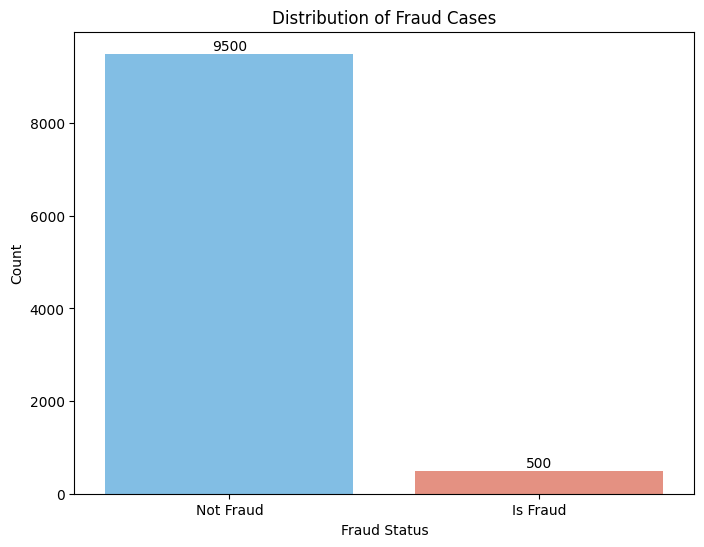

In [16]:
plt.figure(figsize=(8,6))
ax = sns.countplot(main_data, x = "is_fraud",hue = "is_fraud", palette=["#71C2F5","#F58571"] ,legend = False)
plt.xticks([0,1],["Not Fraud","Is Fraud"])
plt.xlabel("Fraud Status")
plt.ylabel("Count")
plt.title("Distribution of Fraud Cases")
for container in ax.containers:
    ax.bar_label(container,fmt="%d")
plt.show()


<Axes: >

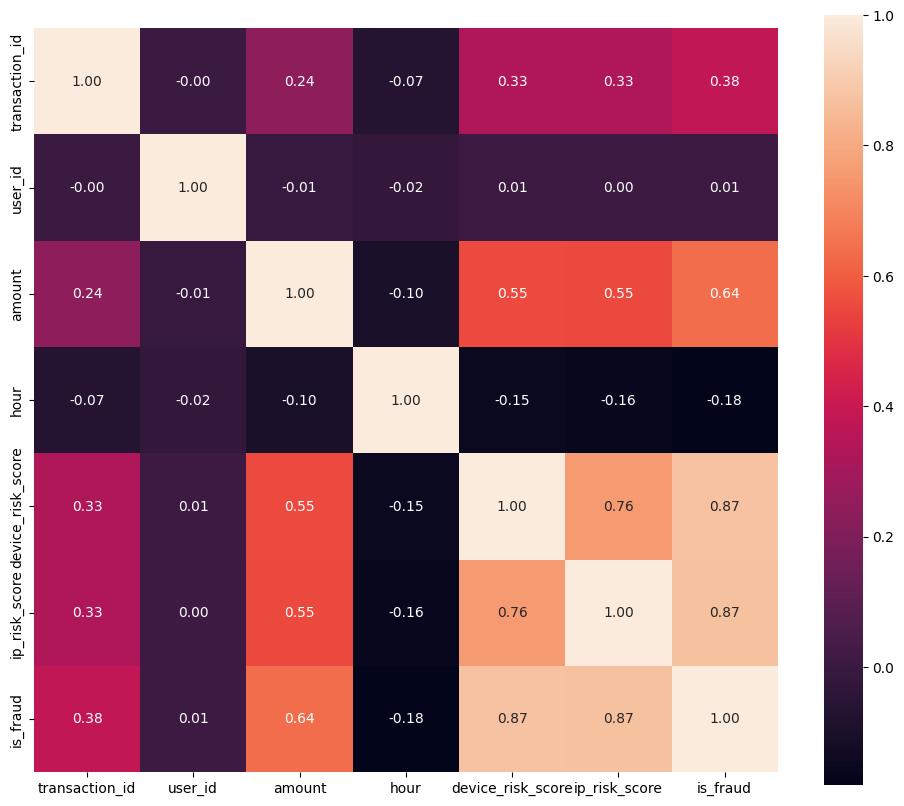

In [17]:
numeric_cols = main_data.select_dtypes(include=['float64', 'int64'])
heat_map_data = numeric_cols.corr()
plt.figure(figsize=(12,10))
sns.heatmap(heat_map_data,annot=True,fmt=".2f",square=True)

### Analysis of Correlation Heatmap
- Heatmap shows that there is a very strong correlation between ip_risk_score, device_risk_score and the transaction being a fraud
- It also shows that there is a strong correlation between amount and the transaction being a fraud
- The correlation between transaction_id and the transaction being a fraud is 0.38, signifying a moderate correlation.
- The correlation between user_id and hour and the transaction being a fraud is very low. 

With this insight, we can deduce that hour and user_id would not be as important in building the model thus we can choose to omit it to prevent any overfitting from occuring.

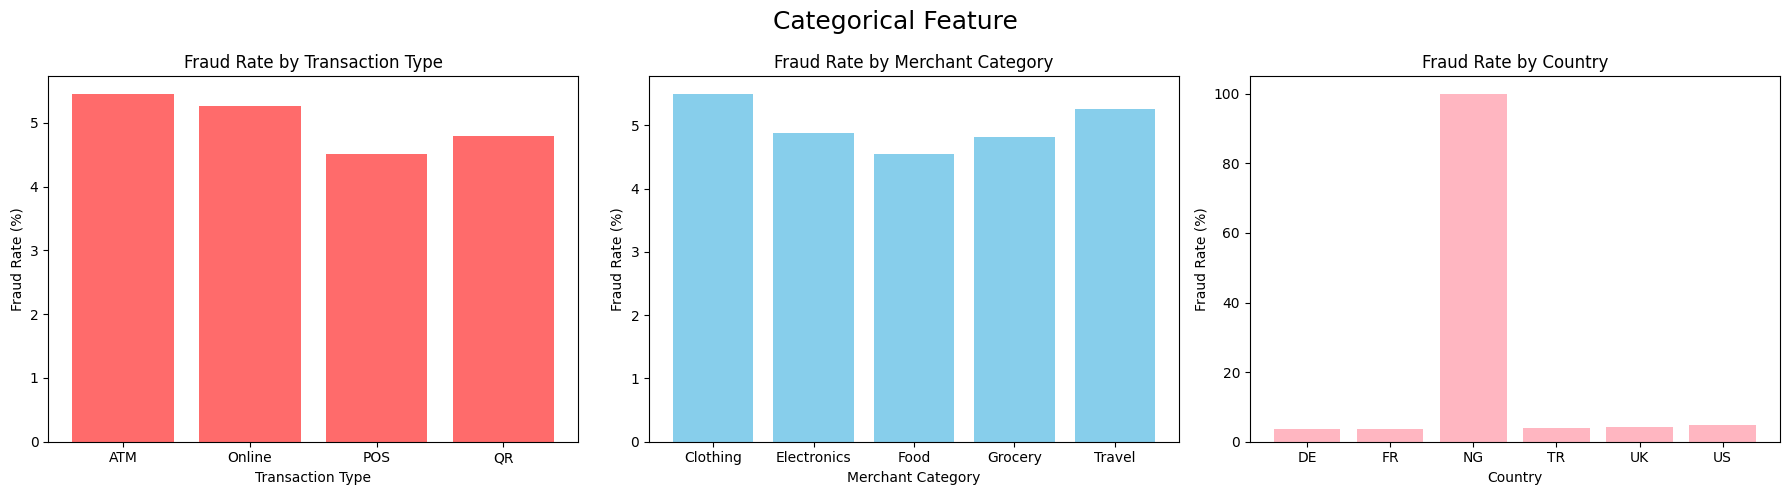

In [73]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
plt.suptitle("Categorical Feature", fontsize=18)
# Transaction Type
fraud_rate_type = main_data.groupby('transaction_type')['is_fraud'].mean() * 100
axes[0].bar(fraud_rate_type.index, fraud_rate_type.values, color='#FF6B6B')
axes[0].set_title('Fraud Rate by Transaction Type')
axes[0].set_xlabel('Transaction Type')
axes[0].set_ylabel('Fraud Rate (%)')
axes[0].tick_params(axis='x')

# Merchant Category
fraud_rate_merchant = main_data.groupby('merchant_category')['is_fraud'].mean() * 100
axes[1].bar(fraud_rate_merchant.index, fraud_rate_merchant.values, color='#87CEEB')
axes[1].set_title('Fraud Rate by Merchant Category')
axes[1].set_xlabel('Merchant Category')
axes[1].set_ylabel('Fraud Rate (%)')
axes[1].tick_params(axis='x',)

# Country
fraud_rate_country = main_data.groupby('country')['is_fraud'].mean() * 100
axes[2].bar(fraud_rate_country.index, fraud_rate_country.values, color='#FFB6C1')
axes[2].set_title('Fraud Rate by Country')
axes[2].set_xlabel('Country')
axes[2].set_ylabel('Fraud Rate (%)')

plt.tight_layout()
plt.show()


### Analysis of Categorical Features
Transaction Type
- The fraud rates by transaction types were mostly equal, showing that it didnt matter which platform was used, frauds were conducted on all 4 platforms at similar rates.

Merchant Category
- Fraud Rates by category were also mostly equal, showing that frauds were conducted across all sectors.

Country
- Fraud rates for all country were equal except for Nigeria (NG) with a staggering 100% fraud rate, this shows that all transactions that had been done in Nigeria were frauds. 

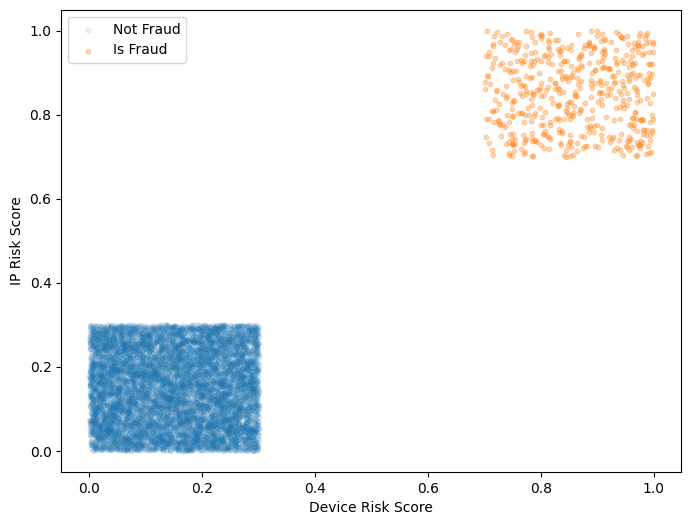

In [19]:
plt.figure(figsize=(8,6))
plt.scatter(main_data[main_data["is_fraud"]==0]["device_risk_score"],main_data[main_data["is_fraud"]==0]["ip_risk_score"],label="Not Fraud",alpha=0.1,s=10)
plt.scatter(main_data[main_data["is_fraud"]==1]["device_risk_score"],main_data[main_data["is_fraud"]==1]["ip_risk_score"],label="Is Fraud",alpha=0.3,s=10)
plt.xlabel("Device Risk Score")
plt.ylabel("IP Risk Score")
plt.legend()

### Analysis of Risk Scores
- This graph shows that which high device risk score and high ip risk score, it is more than likely a fraud , vice versa, with a low device risk score and a low ip risk score, the transaction would be more often than not, not a fraud. 

Text(0.5, 1.0, 'Transaction Amount Distribution')

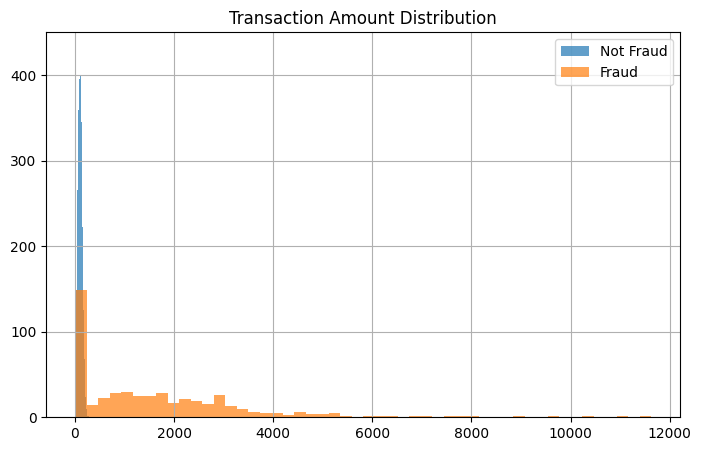

In [20]:
plt.figure(figsize=(18, 5))
plt.subplot(1, 2, 1)
main_data[main_data['is_fraud']==0]['amount'].hist(bins=50, alpha=0.7, label='Not Fraud')
main_data[main_data['is_fraud']==1]['amount'].hist(bins=50, alpha=0.7, label='Fraud')
plt.legend()
plt.title('Transaction Amount Distribution')


### Analysis of Transaction Amounts
- This graph shows that non-fraud transactions often occur where transaction amounts are relatively small, however, they occur at very high transaction volumes
- Where as for transactions that are frauds are generally with relatively bigger amounts, but at lesser transaction volumes.

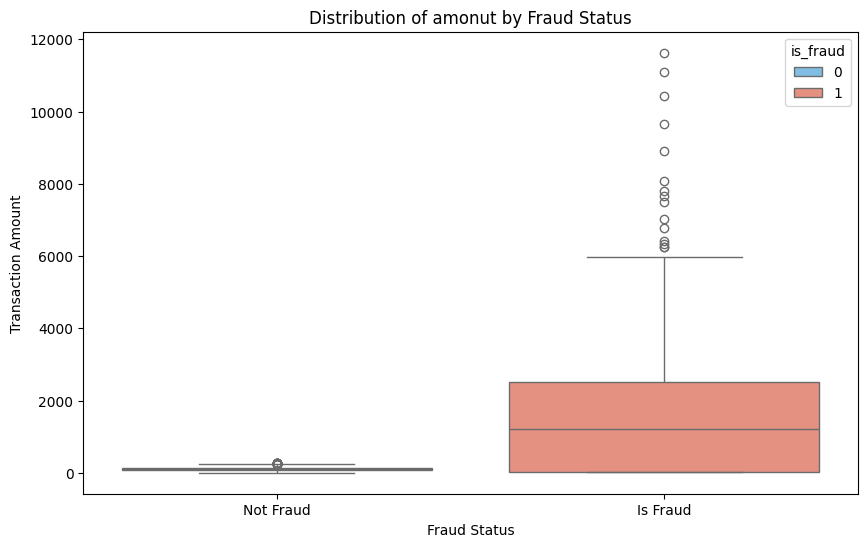

In [21]:
plt.figure(figsize=(10,6))
sns.boxplot(data=main_data,x="is_fraud",y="amount",hue= "is_fraud",palette=["#71C2F5", "#F58571"])
plt.xticks([0,1],["Not Fraud","Is Fraud"])
plt.xlabel("Fraud Status")
plt.ylabel("Transaction Amount")
plt.title("Distribution of amonut by Fraud Status")
plt.show()


### Analysis of Amount Distribution
- This further examplifies the fact that transactions that are not fraud have lower transaction amounts,where as transactions that were labeled as fraud were of relatively larger amounts. 

## Model Preparation

### Creating Training and Test Sets

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
model_data = main_data.drop(["hour","user_id","device_risk_score","ip_risk_score"],axis= 1)
X = model_data.drop(["is_fraud"],axis=1)
y = model_data["is_fraud"]
print(X.columns)
print(X.shape,y.shape)

Index(['transaction_id', 'amount', 'transaction_type', 'merchant_category',
       'country'],
      dtype='str')
(10000, 5) (10000,)


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,stratify=y,random_state=1)
print(f"Original fraud rate: {y.mean():.1%}")
print(f"Train fraud rate: {y_train.mean():.1%}")
print(f"Test fraud rate: {y_test.mean():.1%}")

Original fraud rate: 5.0%
Train fraud rate: 5.0%
Test fraud rate: 5.0%


In [25]:
X_train.head()

,transaction_id,amount,transaction_type,merchant_category,country
6261,1953,156.700025,ATM,Food,UK
944,5145,1.000000,Online,Electronics,DE
2857,7771,75.231769,POS,Clothing,DE
6695,481,95.182668,ATM,Travel,TR
8893,9426,41.165629,POS,Clothing,US


In [26]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.pipeline import Pipeline

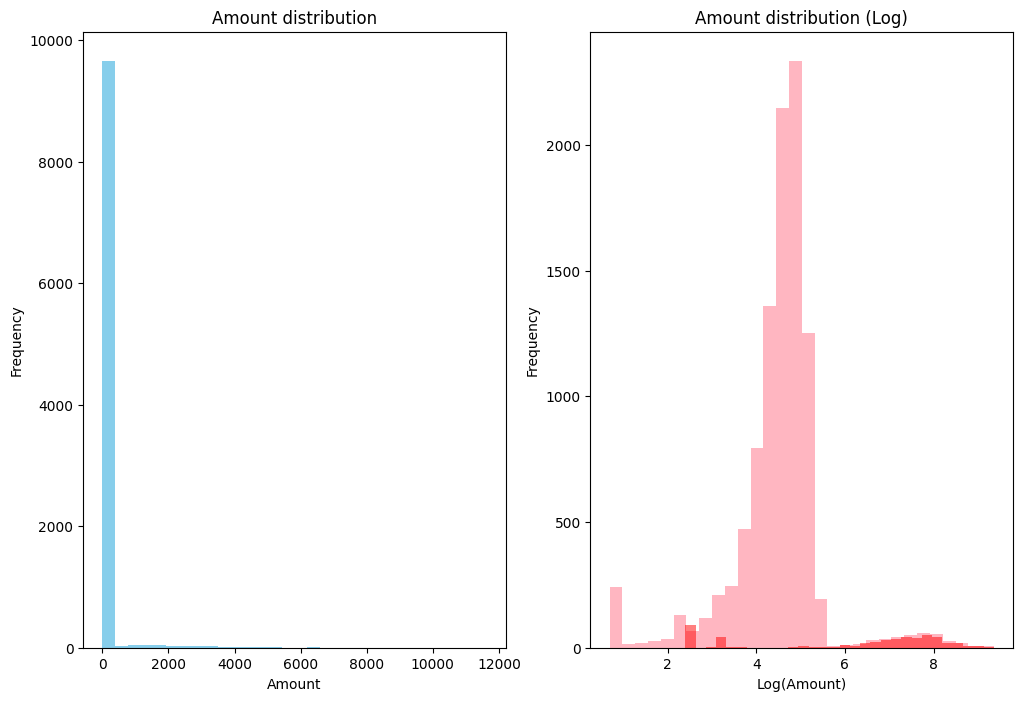

In [27]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.hist(main_data["amount"],bins=30,color="skyblue")
plt.title("Amount distribution")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.subplot(1,2,2) 
ax = plt.hist(np.log1p(main_data["amount"]),bins=30,color="lightpink")
ax1 = plt.hist(np.log1p(main_data[main_data["is_fraud"]==1]["amount"]),bins=30,color="red",alpha = 0.5)
plt.title("Amount distribution (Log)")
plt.xlabel("Log(Amount)")
plt.ylabel("Frequency")
plt.show()

### Scaling Strategy Analysis
- Using log to scale the data would not work as it would remove the key feature of the transaction amounts which is mainly the fact that high transaction amount is normally linked to fraud transaction cases.

In [28]:
std_scaler_full_data = StandardScaler()
amount_scaled = std_scaler_full_data.fit_transform(main_data[["amount"]])
main_data["amount_scaled"] = amount_scaled.flatten()
main_data.head()

,transaction_id,user_id,amount,transaction_type,merchant_category,country,hour,device_risk_score,ip_risk_score,is_fraud,amount_scaled
0,9608,363,4922.587542,ATM,Travel,TR,12,0.992347,0.947908,1,8.924481
1,456,692,48.018303,QR,Food,US,21,0.168571,0.224057,0,-0.244769
2,4747,587,136.881960,Online,Travel,TR,14,0.296127,0.125058,0,-0.077613
3,6934,445,80.534719,POS,Clothing,TR,23,0.124801,0.159243,0,-0.183604
4,1646,729,120.041158,Online,Grocery,FR,16,0.098129,0.027542,0,-0.109291


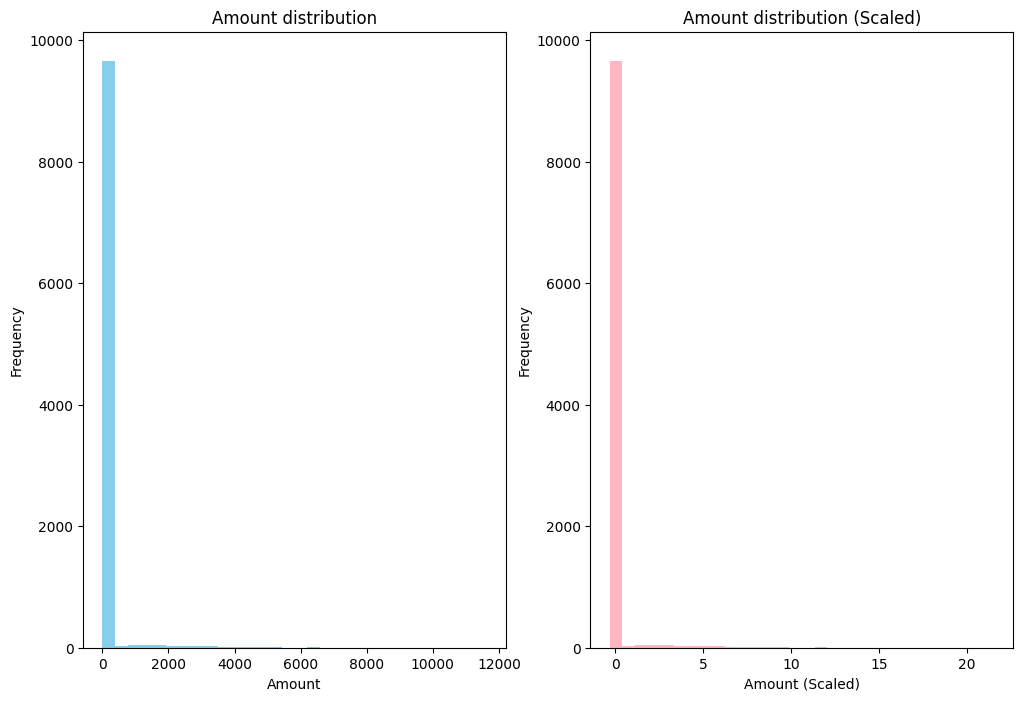

In [29]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.hist(main_data["amount"],bins=30,color="skyblue")
plt.title("Amount distribution")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.subplot(1,2,2) 
plt.hist(main_data["amount_scaled"],bins=30,color="lightpink")
plt.title("Amount distribution (Scaled)")
plt.xlabel("Amount (Scaled)")
plt.ylabel("Frequency")
plt.show()

### Scaling Decision
- Using Standard Scaler as opposed to using log, allows the data to maintain its relationship while being more friendly for the machine learning model.
- Thus, Standard Scaler will be used to scale the training and test sets

In [30]:
std_scaler = StandardScaler()
X_train[["amount"]] = std_scaler.fit_transform(X_train[["amount"]])
X_test[["amount"]] = std_scaler.transform(X_test[["amount"]])

In [31]:
print(X_train.head())
print(X_test.head())

      transaction_id    amount transaction_type merchant_category country
6261            1953 -0.046086              ATM              Food      UK
944             5145 -0.326006           Online       Electronics      DE
2857            7771 -0.192551              POS          Clothing      DE
6695             481 -0.156683              ATM            Travel      TR
8893            9426 -0.253796              POS          Clothing      US
      transaction_id    amount transaction_type merchant_category country
1957            8336 -0.158835              ATM          Clothing      DE
3420            5744 -0.136740           Online       Electronics      DE
3204            5507 -0.121289              ATM          Clothing      FR
517             1634 -0.129943           Online           Grocery      FR
6597            2969 -0.182295              ATM           Grocery      FR


### One-Hot Encoding for Categorical Features

In [32]:
country_category = (X_train["country"].unique())
print(country_category)
transaction_types = (X_train["transaction_type"].unique())
print(transaction_types)
merchant_category = (X_train["merchant_category"].unique())
print(merchant_category)

<StringArray>
['UK', 'DE', 'TR', 'US', 'FR', 'NG']
Length: 6, dtype: str
<StringArray>
['ATM', 'Online', 'POS', 'QR']
Length: 4, dtype: str
<StringArray>
['Food', 'Electronics', 'Clothing', 'Travel', 'Grocery']
Length: 5, dtype: str


- Since the number of countries, transaction type and merchant category is not huge, and we know that countries do affect the fraud rates, we can encode the countries for the machine learning model to make use of it

In [33]:
categories = ["country","transaction_type","merchant_category"]
country_encoder = OneHotEncoder(sparse_output=False,handle_unknown='ignore')
X_train_country_encoded = country_encoder.fit_transform(X_train[categories])
X_test_country_encoded = country_encoder.transform(X_test[categories])

In [34]:
feature_names = country_encoder.get_feature_names_out(categories)

In [35]:
X_train_encoded = pd.DataFrame(X_train_country_encoded,columns = feature_names,index = X_train.index)
X_test_encoded = pd.DataFrame(X_test_country_encoded,columns= feature_names, index = X_test.index)

In [36]:
X_train = X_train.drop(categories,axis = 1)
X_test = X_test.drop(categories,axis = 1)

In [37]:
X_train = pd.concat([X_train,X_train_encoded],axis=1)
X_test = pd.concat([X_test,X_test_encoded],axis=1)

In [38]:
X_train = X_train.drop("transaction_id",axis=1)
X_test = X_test.drop("transaction_id",axis=1)

In [39]:
print("="*80)
print("X_train Details")
print("="*80)
print(X_train.head())
print("="*80)
print("X_test Details")
print("="*80)
print(X_test.head())

X_train Details
        amount  country_DE  country_FR  country_NG  country_TR  country_UK  \
6261 -0.046086         0.0         0.0         0.0         0.0         1.0   
944  -0.326006         1.0         0.0         0.0         0.0         0.0   
2857 -0.192551         1.0         0.0         0.0         0.0         0.0   
6695 -0.156683         0.0         0.0         0.0         1.0         0.0   
8893 -0.253796         0.0         0.0         0.0         0.0         0.0   

      country_US  transaction_type_ATM  transaction_type_Online  \
6261         0.0                   1.0                      0.0   
944          0.0                   0.0                      1.0   
2857         0.0                   0.0                      0.0   
6695         0.0                   1.0                      0.0   
8893         1.0                   0.0                      0.0   

      transaction_type_POS  transaction_type_QR  merchant_category_Clothing  \
6261                   0.0       

## Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,recall_score

In [41]:
log_reg = LogisticRegression(random_state=1)
log_reg.fit(X_train,y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",1
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`multic

In [42]:
prediction = log_reg.predict(X_test)
accuracy = accuracy_score(y_test,prediction)
print(f"Accuracy: {accuracy*100:.2f}%")
print("\n")
print("Classification Report:")
print(classification_report(y_test,prediction,target_names=['Non Fraud','Fraud']))
print("\n")
print("Confusion Matrix:")
print(confusion_matrix(y_test,prediction))

Accuracy: 98.70%


Classification Report:
              precision    recall  f1-score   support

   Non Fraud       0.99      1.00      0.99      2850
       Fraud       1.00      0.74      0.85       150

    accuracy                           0.99      3000
   macro avg       0.99      0.87      0.92      3000
weighted avg       0.99      0.99      0.99      3000



Confusion Matrix:
[[2850    0]
 [  39  111]]


In [43]:
log_model_class_imbalance = LogisticRegression(class_weight="balanced",random_state=1)
log_model_class_imbalance.fit(X_train,y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",'balanced'
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",1
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`

In [44]:
prediction_class_imbalance = log_model_class_imbalance.predict(X_test)

In [45]:
print(f"Accuracy: {accuracy_score(y_test,prediction_class_imbalance)*100:.2f}%")
print("Classification Report:")
print(classification_report(y_test,prediction_class_imbalance,target_names=['Non Fraud','Fraud']))
print("\n")
print("Confusion Matrix:")
print(confusion_matrix(y_test,prediction_class_imbalance))

Accuracy: 98.87%
Classification Report:
              precision    recall  f1-score   support

   Non Fraud       0.99      1.00      0.99      2850
       Fraud       1.00      0.77      0.87       150

    accuracy                           0.99      3000
   macro avg       0.99      0.89      0.93      3000
weighted avg       0.99      0.99      0.99      3000



Confusion Matrix:
[[2850    0]
 [  34  116]]


These 2 logistic regression models, despite them both showing 98.87% in accuracy, is in fact not as optimised as it could be as out of the 150 frauds, it was only able to predict it accurately about 77% of the time. Hence, a simple logistic regression model is not a good choice to use to predict if a transaction is a fraud or not.

## Random Forest Classifier

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
forest_reg = RandomForestClassifier(random_state=1,n_jobs=-1,class_weight="balanced")

In [48]:
forest_reg.fit(X_train,y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [49]:
print("Predictions:")
rf_prediction = forest_reg.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test,rf_prediction)*100:.2f}%")
print("Classification Report:")
print(classification_report(y_test,rf_prediction,target_names=["Non Fraud", "Fraud"]))
print("Confusion matrix: ")
cm  = confusion_matrix(y_test,rf_prediction)
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TP = cm[1,1]
print(f"Accuracy at finding frauds: {recall_score(y_test,rf_prediction)*100:.2f}%")


Predictions:
Accuracy: 99.03%
Classification Report:
              precision    recall  f1-score   support

   Non Fraud       0.99      1.00      0.99      2850
       Fraud       0.95      0.85      0.90       150

    accuracy                           0.99      3000
   macro avg       0.97      0.92      0.95      3000
weighted avg       0.99      0.99      0.99      3000

Confusion matrix: 
Accuracy at finding frauds: 84.67%


## XGBoost

In [50]:
from xgboost import XGBClassifier

In [51]:
xgb_classifier = XGBClassifier(random_state = 1, n_jobs=-1, scale_pos_weight = 16,learning_rate=0.1,subsample=0.7,colsample_bytree=0.7,max_depth=4)

In [52]:
xgb_classifier.fit(X_train,y_train)

,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'binary:logistic'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,0.7
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes f

In [53]:
xgb_prediction = xgb_classifier.predict(X_test)

In [54]:
print(f"Accuracy: {accuracy_score(y_test,xgb_prediction)*100:.2f}%")
print("Classification Report:")
print(classification_report(y_test,xgb_prediction,target_names=["Non Fraud", "Fraud"]))
print("Confusion matrix: ")
cm  = confusion_matrix(y_test,xgb_prediction)
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TP = cm[1,1]
print(cm)
print(f"Accuracy at finding frauds: {recall_score(y_test,xgb_prediction)*100:.2f}%")

Accuracy: 99.43%
Classification Report:
              precision    recall  f1-score   support

   Non Fraud       1.00      0.99      1.00      2850
       Fraud       0.91      0.99      0.95       150

    accuracy                           0.99      3000
   macro avg       0.95      0.99      0.97      3000
weighted avg       0.99      0.99      0.99      3000

Confusion matrix: 
[[2835   15]
 [   2  148]]
Accuracy at finding frauds: 98.67%


## XGBoost Feature Importance

In [55]:
feature_importance = pd.DataFrame({
    "feature_name": X_train.columns,
    "importance": xgb_classifier.feature_importances_
}).sort_values('importance',ascending=False)
print(feature_importance)

                     feature_name  importance
0                          amount    0.470535
3                      country_NG    0.223156
2                      country_FR    0.035332
7            transaction_type_ATM    0.033180
11     merchant_category_Clothing    0.026815
12  merchant_category_Electronics    0.025006
15       merchant_category_Travel    0.024850
8         transaction_type_Online    0.023976
9            transaction_type_POS    0.020798
13         merchant_category_Food    0.020251
5                      country_UK    0.018643
14      merchant_category_Grocery    0.018586
6                      country_US    0.018250
4                      country_TR    0.015930
10            transaction_type_QR    0.015835
1                      country_DE    0.008855


- This insight shows us that amount and the country being Nigeria were the more important features for fraud detection

## Creation of Pipeline

In [56]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [57]:
amount_feature = ["amount"]
categorical_feature = ["country","transaction_type","merchant_category"]

In [58]:
preprocessor = ColumnTransformer(transformers=[('scaler',StandardScaler(),amount_feature),('encoder',OneHotEncoder(sparse_output=False,handle_unknown='ignore'),categorical_feature)],remainder="drop")

In [59]:
fraud_detection_pipeline = Pipeline(steps=[('preprocessor',preprocessor),('classifier',XGBClassifier(random_state =1,n_jobs=1,scale_pos_weight=16,learning_rate = 0.1,col_sample_bytree=0.7,max_depth = 4,sub_sample = 0.7))])

In [60]:
X_raw = main_data.drop("is_fraud",axis=1)
y_raw = main_data["is_fraud"]

In [61]:
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(X_raw,y_raw,test_size=0.3,stratify=y_raw,random_state=1)

In [62]:
X_train_raw.head()

,transaction_id,user_id,amount,transaction_type,merchant_category,country,hour,device_risk_score,ip_risk_score,amount_scaled
6261,1953,742,156.700025,ATM,Food,UK,7,0.056649,0.297749,-0.040335
944,5145,281,1.000000,Online,Electronics,DE,23,0.250977,0.045316,-0.333212
2857,7771,943,75.231769,POS,Clothing,DE,11,0.086940,0.094868,-0.193579
6695,481,4,95.182668,ATM,Travel,TR,13,0.075453,0.222839,-0.156051
8893,9426,557,41.165629,POS,Clothing,US,17,0.177610,0.214401,-0.257659


In [63]:
fraud_detection_pipeline.fit(X_train_raw,y_train_raw)

/Users/daien/Code/Personal/fraudDetection/.venv/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [14:00:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "col_sample_bytree", "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessor', ...), ('classifier', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('scaler', ...), ('encoder', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different tra

In [64]:
pipeline_prediction = fraud_detection_pipeline.predict(X_test_raw)

In [65]:
print(f"Classification report:{classification_report(y_test_raw,pipeline_prediction,target_names=["Non Fraud","Fraud"])}")

Classification report:              precision    recall  f1-score   support

   Non Fraud       1.00      1.00      1.00      2850
       Fraud       0.93      0.99      0.96       150

    accuracy                           1.00      3000
   macro avg       0.97      0.99      0.98      3000
weighted avg       1.00      1.00      1.00      3000



In [66]:
pipeline_cm = confusion_matrix(y_test_raw,pipeline_prediction)
print(pipeline_cm)

[[2839   11]
 [   2  148]]


In [67]:
print(f"Accuracy at detecting frauds when transaction is a fraud: {recall_score(y_test_raw,pipeline_prediction)*100:.2f}%")

Accuracy at detecting frauds when transaction is a fraud: 98.67%
